# Import packages

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings('ignore')
%matplotlib inline

# Read "train.csv"

In [283]:
df_train = pd.read_csv('train_cleaned.csv')
len(df_train.columns)
df_train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Nbrh.factor
0,1,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,...,None,None,None,0,2,2008,WD,Normal,208500,CollgCr
1,2,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,...,None,None,None,0,5,2007,WD,Normal,181500,Veenker
2,3,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,...,None,None,None,0,9,2008,WD,Normal,223500,CollgCr
3,4,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,...,None,None,None,0,2,2006,WD,Abnorml,140000,Crawfor
4,5,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,...,None,None,None,0,12,2008,WD,Normal,250000,NoRidge


# Correlation matrix

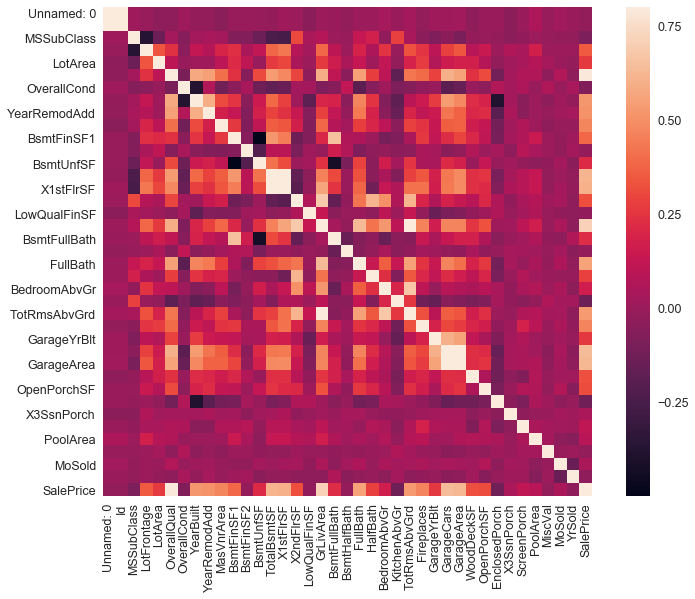

In [23]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

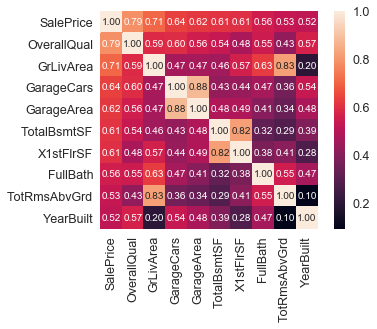

In [206]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Reframe data

In [284]:
SalePrice = df_train['SalePrice']
OverallQual = df_train['OverallQual']
GrLivArea = df_train['GrLivArea']
GarageCars = df_train['GarageCars']

df_train['Neighborhood'] = pd.Categorical(df_train['Neighborhood'])
df_train['codeNeig'] = df_train['Neighborhood'].cat.codes

df_train['ExterQual'] = pd.Categorical(df_train['ExterQual'])
df_train['codeExter'] = df_train['ExterQual'].cat.codes

df_train['KitchenQual'] = pd.Categorical(df_train['KitchenQual'])
df_train['codeKitchen'] = df_train['KitchenQual'].cat.codes

codeNeig=df_train['codeNeig']
codeExter=df_train['codeExter']

BsmtFinSF1=df_train['BsmtFinSF1']
X1stFlrSF=df_train['X1stFlrSF']
X2ndFlrSF=df_train['X2ndFlrSF']
LotArea=df_train['LotArea']
FullBath = df_train['FullBath']
codeKitchen=df_train['codeKitchen']
YearBuilt = df_train['YearBuilt']


In [291]:

train_new=pd.concat([SalePrice, GrLivArea,OverallQual,GarageCars,X1stFlrSF,LotArea,codeKitchen,X2ndFlrSF,codeNeig,BsmtFinSF1,codeExter,FullBath,YearBuilt], axis=1)
train_new = train_new.assign(log_SalePrice = np.log(train_new['SalePrice']))
#print(train_new)

# Split train and validation data

In [292]:
X=train_new.drop('log_SalePrice',1)
X=X.drop('SalePrice',1)

Y=train_new['SalePrice']

X_train,X_test= train_test_split(X, test_size = 0.3, shuffle =True)
Y_train,Y_test= train_test_split(Y, test_size =  0.3, shuffle =True)

# KNN

When K is 76, the MAE is 54907.95949712387.


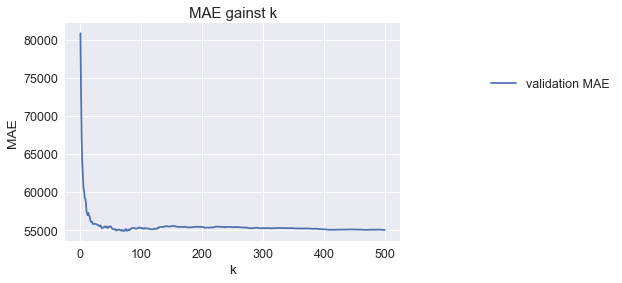

In [293]:
import matplotlib.pyplot as plt
import pylab
errors_test=[]
Ks = range(1,500)
for k in Ks:
    neighbor = KNeighborsRegressor(k)
    neighbor.fit(X_train,Y_train) 
    predict = neighbor.predict(X_test)
    error=mean_absolute_error(Y_test,predict)
    errors_test.append(error)
plt.plot(Ks,errors_test,label="validation MAE") #blue
pylab.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.xlabel('k')
plt.ylabel('MAE')
plt.title('MAE gainst k')
print('When K is {}, the MAE is {}.'.format(errors_test.index(min(errors_test)),min(errors_test)))
plt.show()

# Loess

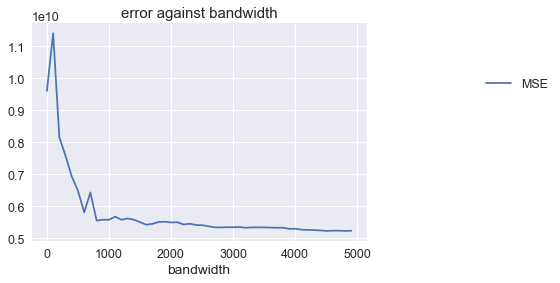

When R is 48, the MSE is 5234453127.18507.


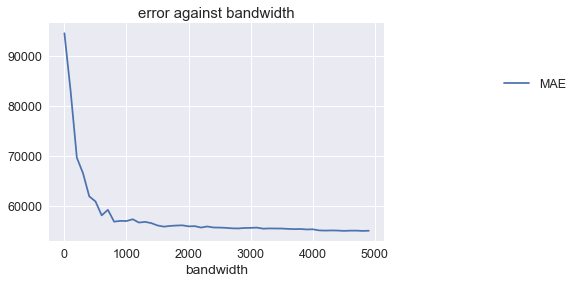

When R is 48, the MAE is 54932.68997727367.


In [294]:
MSE_test= []
MAE_test = []

band_widths = np.arange(1,5000,100)
for i in band_widths:
    neigh = RadiusNeighborsRegressor(radius=i)
    neigh.fit(X_train,Y_train)
    predict = neigh.predict(X_test)
    frame_test=pd.DataFrame({'predict_test':predict,'Y_test':Y_test})
    frame_test = frame_test.dropna(subset = ['predict_test'])
    MSE= mean_squared_error(frame_test['Y_test'],frame_test['predict_test'])
    MSE_test.append(MSE)
    MAE=mean_absolute_error(frame_test['Y_test'],frame_test['predict_test'])
    MAE_test.append(MAE)
    
plt.figure()
plt.plot(band_widths,MSE_test,label = 'MSE')
plt.xlabel('bandwidth')
pylab.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.title('error against bandwidth')
plt.show()
print('When R is {}, the MSE is {}.'.format(MSE_test.index(min(MSE_test)),min(MSE_test)))
plt.plot(band_widths,MAE_test,label = 'MAE')
plt.xlabel('bandwidth')
pylab.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.title('error against bandwidth')
plt.show()
print('When R is {}, the MAE is {}.'.format(MAE_test.index(min(MAE_test)),min(MAE_test)))

# Naive model

In [226]:
len(Y_test)
Y_train.mean
m=[162000]*len(Y_test)
print(m)
error = mean_absolute_error(Y_test,m)
print(error)

438